In [46]:
# !pip install -U langgraph langsmith

In [1]:
# from typing import Annotated
# from typing_extensions import TypedDict

# from langgraph.graph import StateGraph, START, END
# from langgraph.graph.message import add_messages
# from langchain.chat_models import init_chat_model


In [2]:
# class State(TypedDict):
#     # Messages have the type "list". The `add_messages` function
#     # in the annotation defines how this state key should be updated
#     # (in this case, it appends messages to the list, rather than overwriting them)
#     messages: Annotated[list, add_messages]


# graph_builder = StateGraph(State)

In [3]:
# from langchain.chat_models import init_chat_model

# # Initialize the Mistral model
# llm = init_chat_model("mistral-large-latest", model_provider="mistralai", api_key="ERbtRhtyGei4jY4AXn4QkrWSfGzlpLbP")


# def chatbot(state: State):
#     """
#     Function to handle the chatbot node.
#     It takes the current state and returns the AI response.
#     """
#     response = llm.invoke(state["messages"])
#     return {"messages": [response]}

# # Add the chatbot node to the graph
# graph_builder.add_node("chatbot", chatbot)


In [4]:
# graph_builder.add_edge(START, "chatbot")

In [5]:
# graph_builder.add_edge("chatbot", END)

In [6]:
# graph = graph_builder.compile()

In [7]:
# from IPython.display import Image, display

# try:
#     display(Image(graph.get_graph().draw_mermaid_png()))
# except Exception:
#     pass

In [8]:
# def stream_graph_updates(user_input: str):
#     for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
#         for value in event.values():
#             print("Assistant:", value["messages"][-1].content)


# while True:
#     try:
#         user_input = input("User: ")
#         if user_input.lower() in ["quit", "exit", "q"]:
#             print("Goodbye!")
#             break

#         stream_graph_updates(user_input)
#     except:
#         user_input = "What do you know about LangGraph?"
#         print("User: " + user_input)
#         stream_graph_updates(user_input)
#         break

In [9]:
# Version  2 : Invoking a Tool with the model

In [10]:
# from typing import Dict
# from langchain.tools import tool

# # Create a basic math tool
# @tool("basic_math")
# def basic_math_tool(operation: str, a: float, b: float) -> Dict:
#     """
#     A simple math tool that performs addition, subtraction, multiplication, and division.

#     Args:
#     - operation (str): The math operation to perform (add, subtract, multiply, divide).
#     - a (float): First number.
#     - b (float): Second number.

#     Returns:
#     - Dict: The result of the operation.
#     """
#     if operation == "add":
#         return {"result": a + b}
#     elif operation == "subtract":
#         return {"result": a - b}
#     elif operation == "multiply":
#         return {"result": a * b}
#     elif operation == "divide":
#         if b == 0:
#             return {"error": "Cannot divide by zero"}
#         return {"result": a / b}
#     else:
#         return {"error": "Invalid operation"}


In [11]:
# from typing import Annotated

# from langchain.chat_models import init_chat_model
# from typing_extensions import TypedDict

# from langgraph.graph import StateGraph, START, END
# from langgraph.graph.message import add_messages

In [12]:
# class State(TypedDict):
#     messages: Annotated[list, add_messages]

In [13]:
# graph_builder = StateGraph(State)

In [14]:
# from langchain.schema import HumanMessage, AIMessage

# def tool_node(state: State):
#     """
#     Node that invokes the math tool.
#     """
#     # Extract the last message correctly
#     last_message = state["messages"][-1]
    
#     # Check if the message is an instance of HumanMessage
#     if isinstance(last_message, HumanMessage):
#         message = last_message.content.lower()
#     else:
#         message = str(last_message)  # Fallback for unexpected types

#     # Math tool invocation
#     if "calculate" in message:
#         try:
#             _, operation, a, b = message.split()  # Extract parameters
#             a, b = float(a), float(b)  # Convert to floats
#             result = basic_math_tool(operation, a, b)

#             response = f"Result: {result['result']}" if "result" in result else result['error']

#         except (ValueError, IndexError):
#             response = "Invalid input. Use format: 'calculate add 10 5'."

#     else:
#         response = "I can only calculate math operations."

#     # Return the message in the correct format
#     return {"messages": [AIMessage(content=response)]}


In [15]:
# # Add the tool node to the graph
# graph_builder.add_node("math_tool", tool_node)

# def chatbot(state: State):
#     """
#     LLM node that handles the chatbot interactions.
#     """
#     # Convert messages to dictionaries with "role" and "content"
#     llm_messages = [
#         {
#             "role": "user" if isinstance(msg, HumanMessage) else "ai",
#             "content": msg.content
#         }
#         for msg in state["messages"]
#     ]

#     # Invoke the LLM with properly formatted messages
#     response = llm.invoke(llm_messages)

#     # Return the AI's response
#     return {"messages": [AIMessage(content=response)]}


In [16]:
# # Add LLM node
# graph_builder.add_node("chatbot", chatbot)

# graph_builder.set_entry_point("math_tool")
# graph_builder.add_edge("math_tool", "chatbot")
# graph_builder.add_edge("chatbot", END)

In [17]:
# graph = graph_builder.compile()

In [18]:
# from IPython.display import Image, display

# try:
#     display(Image(graph.get_graph().draw_mermaid_png()))
# except Exception:
#     pass

In [19]:
# # Import message types
# from langchain.schema import HumanMessage, AIMessage

# # Initialize state with proper message types
# state = {"messages": [HumanMessage(content="calculate add 10 5")]}  

# # Run the graph
# output = graph.invoke(state)

# # Print the AI's response
# print("AI Response:", output["messages"][-1].content)


In [20]:
# !pip install -q langgraph langchain

# from typing import Annotated
# from typing_extensions import TypedDict
# from langchain.schema import HumanMessage, AIMessage
# from langchain.chat_models import init_chat_model
# from langchain.tools import tool
# from langgraph.graph import StateGraph
# from langgraph.graph.message import add_messages

# # Create a simple math tool
# @tool("basic_math")
# def basic_math_tool(operation: str, a: float, b: float):
#     """
#     A simple math tool that performs basic operations.
    
#     Args:
#     - operation (str): The operation (add, subtract, multiply, divide).
#     - a (float): The first number.
#     - b (float): The second number.

#     Returns:
#     - dict: Result of the operation or an error message.
#     """
#     if operation == "add":
#         return {"result": a + b}
#     elif operation == "subtract":
#         return {"result": a - b}
#     elif operation == "multiply":
#         return {"result": a * b}
#     elif operation == "divide":
#         if b == 0:
#             return {"error": "Cannot divide by zero"}
#         return {"result": a / b}
#     else:
#         return {"error": "Invalid operation"}

In [21]:

# # Define the state with messages containing 'role' and 'content'
# class ChatState(TypedDict):
#     messages: Annotated[list, add_messages]



In [22]:
# # Initialize the Mistral LLM
# llm = init_chat_model("mistral-large-latest", model_provider="mistralai")


In [23]:
# # Initialize the graph
# graph_builder = StateGraph(ChatState)

In [24]:

# # Define the chatbot node
# def chatbot(state: ChatState):
#     """
#     Chatbot function that invokes the math tool if the user asks for a calculation.
#     """
#     last_message = state["messages"][-1]

#     # Ensure the message is from the user
#     if isinstance(last_message, HumanMessage):
#         message = last_message.content.lower()

#         # Check if the message asks for a calculation (e.g., "calculate add 10 5")
#         if "calculate" in message:
#             try:
#                 # Extract the operation and numbers
#                 _, operation, a, b = message.split()
#                 a, b = float(a), float(b)  # Convert to float
                
#                 # Invoke the math tool correctly
#                 result = basic_math_tool({"operation": operation, "a": a, "b": b})

#                 # Prepare the response
#                 if "result" in result:
#                     response = f"Result: {result['result']}"
#                 else:
#                     response = result['error']
#             except (ValueError, IndexError):
#                 response = "Invalid input. Use format: 'calculate add 10 5'."
#         else:
#             # If it's not a calculation request, use the LLM to process the message
#             response = llm.invoke([{"role": "user", "content": message}])

#     else:
#         response = "I can only respond to text messages."

#     return {"messages": [AIMessage(content=response)]}

In [25]:

# # Add the chatbot node to the graph
# graph_builder.add_node("chatbot", chatbot)


In [26]:
# # Set the entry point for the graph
# graph_builder.set_entry_point("chatbot")

In [27]:
# # Compile the graph
# graph = graph_builder.compile()


In [28]:
# from IPython.display import Image, display

# try:
#     display(Image(graph.get_graph().draw_mermaid_png()))
# except Exception:
#     pass

In [29]:
# # Initialize the state with a user message
# state = {"messages": [HumanMessage(content="calculate add 10 5")]}
# # Run the graph
# output = graph.invoke(state)

# # Print the AI response
# print("AI Response:", output["messages"][-1].content)

In [30]:
# Version 3 with Retrieval Tool

In [31]:
from dotenv import load_dotenv
import os


mistral_key = os.getenv('MISTRAL_API_KEY') or "ERbtRhtyGei4jY4AXn4QkrWSfGzlpLbP"


pinecone_key = os.getenv('PINECONE_API_KEY') or "pcsk_4JbxFQ_ER3PXrERZ8MZCFnuCVVvSSyMvwwbY12TNjS9v3mvhArhqRBKSL3ybBVRxyRFUge"

index_name = os.getenv("INDEX_NAME") or "physics"

nomic_api = os.getenv("NOMIC_API_KEY") or "nk-P3wRGEV1vGYbvKVMHbFyC3wn6e1NgfgKHt8CEyjYmpo"

# print(mistral_key)
# print(pinecone_key)
# print(index_name)




In [32]:
from langchain_ollama import OllamaEmbeddings
from langchain_nomic import NomicEmbeddings
from langchain_mistralai import ChatMistralAI

embeddings = OllamaEmbeddings(
    model="nomic-embed-text"
)


mistral_model = ChatMistralAI(model="mistral-large-latest", temperature=0, api_key=mistral_key)

In [33]:
import os
from pinecone import Pinecone, ServerlessSpec
from langchain.docstore.document import Document
import numpy as np
from langchain_community.embeddings import OllamaEmbeddings
from langchain_pinecone import PineconeVectorStore
import time 


class PineconeVectorStore:
    def __init__(self, index_name, embedding, pinecone_api_key):
        
        self.pc = Pinecone(api_key=pinecone_api_key)
        self.embedding = embedding
        

        existing_indexes = [index_info["name"] for index_info in self.pc.list_indexes()]

        # Check to see if the index already exist, if it does, it will connect it. 
        # By default, it will create an index
        if index_name not in existing_indexes:
            self.pc.create_index(
                name=index_name,
                dimension=768,
                metric="cosine",
                spec=ServerlessSpec(cloud="aws", region="us-east-1"),
            )
            while not self.pc.describe_index(index_name).status["ready"]:
                time.sleep(1)

        
        # Access the Pinecone index
        self.index = self.pc.Index(index_name)
        print("Vector Store Successfully connected")

    

    def similarity_search_by_vector(self, query, k=5):
        """Perform similarity search in Pinecone."""
        # Perform similarity search with the given embedding
        embedding = self.embedding.embed_query(query)
        results = self.index.query(
            vector=embedding,
            top_k=k,
            include_values=False,
            include_metadata=True,
        )
        
        
        if results.get("matches"):
            return [
                Document(
                    page_content=f"Sub-topic: {result['metadata'].get('sub_topic', 'N/A')}\n"
                                f"Text: {result['metadata'].get('text', 'N/A')}\n"
                                f"Role: {result['metadata'].get('role_1', 'N/A')}\n"
                                f"Source: {result['metadata'].get('source', 'N/A')}", 
                    metadata=result['metadata']
                )
                for result in results['matches']
            ]
        else:
            print("No matches found")
            return []


    def as_retriever(self):
        """Return the vector store as a retriever."""
        return self


In [34]:
pineconevs = PineconeVectorStore(index_name, embeddings, pinecone_key)

Vector Store Successfully connected


In [35]:
# Testing out the Pinecone vector store connectivity
retriever = pineconevs.as_retriever()

li = retriever.similarity_search_by_vector("Newton")
print(li)

[Document(metadata={'content': 'To find the force generated during a muscle contraction, we can use the formula:\n\nForce (F) = Tension (T) × Cross-sectional area (A)\n\nGiven the maximum tension (T) is 80 N/cm² and the cross-sectional area (A) is 50 cm², we can plug these values into the formula:\n\nF = 80 N/cm² × 50 cm²\n\nF = 4000 N\n\nTherefore, the force generated during a muscle contraction is 4000 Newtons.', 'role_1': 'Physicist_RoleType.ASSISTANT', 'source': '025_008_003.json', 'sub_topic': 'Analyzing the mechanics of muscle contraction.', 'topic': 'Biophysics'}, page_content='Sub-topic: Analyzing the mechanics of muscle contraction.\nText: N/A\nRole: Physicist_RoleType.ASSISTANT\nSource: 025_008_003.json'), Document(metadata={'content': 'In a quantum harmonic oscillator, the ground state wave function is given by the Gaussian function:\n\nψ(x) = (α/π)^(1/4) * exp(-αx^2/2)\n\nwhere α = (mω/ħ) and ω = sqrt(k/m) is the angular frequency of the oscillator.\n\nThe average position 

In [36]:
def retrieve(query: str) -> list:
    """
    Retrieves Physics documents using cosine similarity search from Pinecone vector database.

    Args:
        query (str): Search query for physics datasets 

    Returns:
        list: Matching top 5 documents  documents from Pinecone database
    """
    retrieved_docs = pineconevs.similarity_search_by_vector(query)
    return retrieved_docs

In [37]:
# Testing out the retreival tool itself
retrieve("Quantumn Theory")

[Document(metadata={'content': 'Designing and implementing a quantum neural network (QNN) circuit to solve a classification problem involves several steps, including choosing a suitable problem, preparing the quantum data, designing the QNN architecture, training the network, and evaluating its performance. Here\'s an outline of the process:\n\n1. Choose a suitable classification problem: For this example, let\'s consider a simple binary classification problem, such as classifying the XOR function, where the input is a pair of binary values (0 or 1), and the output is their XOR.\n\n2. Prepare the quantum data: To encode classical data into quantum states, we can use the amplitude encoding method. For the XOR problem, we have four possible input pairs: (0,0), (0,1), (1,0), and (1,1). We can represent these as normalized quantum states:\n\n|ψ(0,0)⟩ = |00⟩\n|ψ(0,1)⟩ = (|01⟩ + |10⟩) / √2\n|ψ(1,0)⟩ = (|01⟩ - |10⟩) / √2\n|ψ(1,1)⟩ = |11⟩\n\n3. Design the QNN architecture: A simple QNN archite

In [38]:
# Discord Tool itself -> AS a raw funciton testing

import sys
import requests
# discord_webhook_url=https://discord.com/api/webhooks/1339394284356632606/laM3rIiRAvZDJ0o5FLXrP3-b5bzx-bkskwTjtZl7j128rznq9JyD1i2ReulX_bxo5wqM
webhook_url =  "https://discord.com/api/webhooks/1356111484244983859/MdKULHOwZ-bYFjhEORITJEUtA7QTEyOwOWhVDPT-ER5vZkzSQA16RyaEmAj5lB8hkI6Z"
data = {
    "content": "Hello"
}

response = requests.post(webhook_url, json=data)

if response.status_code == 204:
    print("Message sent successfully!")
else:
    print(f"Failed to send message. Status code: {response.status_code}")
    print(response.text)





Message sent successfully!


In [39]:
import sys
import requests

def discord(message:str)->dict[str, str]:
    """
    Sends a message to Discord channel via webhook.

    Args:
        message (str): Text content to send to Discord

    Returns:
        dict: {'message': 'success'} if sent, {'message': 'error message'} if failed
    """
    data = {"content": message}
    try:
        response = requests.post(webhook_url, json=data)
        if response.status_code == 204:
            return {'message': 'success'}
        return {'message': f'Failed to send message. Status code: {response.status_code}'}
    except Exception as e:
        return {'message': f'Error: {str(e)}'}

In [47]:
discord("This is tutor you")

{'message': 'success'}

In [41]:
from typing import (
    Annotated,
    Sequence,
    TypedDict,
)
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    """The state of the agent."""
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [42]:
# Wrap individual tools into a utility box for our 
tools = [retrieve, discord]

In [43]:
import json
from langchain_core.messages import ToolMessage, SystemMessage, AIMessage
from langchain_core.runnables import RunnableConfig
from langgraph.prebuilt import ToolNode



def physics_agent(state: AgentState, config: RunnableConfig):
    """Physics tutor agent with explicit tool guidelines, history handling, and Discord tool usage."""
    
    system_prompt = SystemMessage(
        """
        You are an AI physics assistant, strictly designed to help students understand physics concepts.  
        You also have access to specific tools to assist with study-related activities.  

        ### **Rules and Constraints:**  
        1. **Physics-Only Responses:**  
           - You will **only answer physics-related questions**.  
           - Topics include: classical mechanics, electromagnetism, quantum mechanics, thermodynamics, relativity, astrophysics, particle physics, and other core physics subjects.  
           - If a query is not physics-related, you will respond with:  
             **"I can only answer physics-related questions."**  

        2. **Clarifications Only for Physics:**  
           - If a question is unclear, ask for clarification **only if it appears to be physics-related**.  

        3. **Tool Usage Instructions:**  
           - You have access to the following tools:  

           - **Retrieve Tool:**  
             - Fetch textbook content or reference materials.  
             - Search by topic or concept to find detailed explanations.  
             - If the requested information is not found, explain this to the student.  

           - **Discord Tool:**  
             - Use this tool to assist with study-related activities on Discord.  
             - Capabilities:  
                - **Generate Study Guides:** Create detailed, organized study guides based on requested topics.  
                - **Create Study Group Plans:** Outline study group objectives, schedules, and topics.  
                - **Schedule Study Sessions:** Suggest dates/times for group or individual study sessions.  
             - Ensure that all Discord messages are clear, structured, and professional.  

        4. **History Awareness:**  
           - Use the conversation history to maintain context.  
           - If history is insufficient, rely on the retrieve tool.  

        5. **Formatting and Clarity:**  
           - Present information clearly and concisely.  
           - Use bullet points, equations, or step-by-step reasoning when necessary.

        ---
        **Conversation History:**  
        {history}  

        **Context:**  
        {context}  

        **Question:**  
        {question}
        """
    )
    
    # Model execution with tools
    model = mistral_model.bind_tools(tools)

    
    response = model.invoke([system_prompt] + state["messages"], config)
    
    return {"messages": [response]}



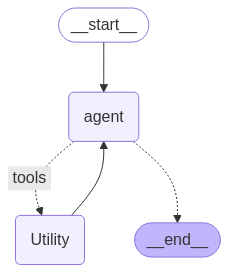

In [44]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import tools_condition
memory = MemorySaver()


agent_tool = ToolNode(tools)
workflow01 = StateGraph(AgentState)


workflow01.add_node("agent", physics_agent)
workflow01.add_node("Utility", agent_tool)

workflow01.set_entry_point("agent")

workflow01.add_conditional_edges(
    "agent",
    tools_condition ,
    {
        "tools": "Utility",
        END: END,

    },
)

workflow01.add_edge("Utility", "agent") 

graph01 = workflow01.compile(checkpointer=memory) 


from IPython.display import Image, display
try:
    display(Image(graph01.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [48]:
from langchain_core.messages import HumanMessage

while True:
    user_input = input("Your question: ")
    if user_input.lower() == "exit":
        break
    input_message = [HumanMessage(content=user_input)]

    config = {"configurable": {"session_id": "abc123", "thread_id": "abc123"}}

    for step in graph01.stream({"messages": input_message}, config=config, stream_mode="values"):
        if "messages" in step and step["messages"]:
            step["messages"][-1].pretty_print()

================================ Human Message =================================

could you explain quantumn theory and send it on discord? 
================================== Ai Message ==================================
Tool Calls:
  discord (zafKOR7Hi)
 Call ID: zafKOR7Hi
  Args:
    message: Quantum theory is a fundamental theory in physics that provides a description of the physical properties of nature at the scale of atoms and subatomic particles. It introduces some of the most groundbreaking and, admittedly, confusing concepts in all of physics. 

### Key Concepts:

1. **Wave-Particle Duality**: 
   - In quantum theory, particles can exhibit both wave-like and particle-like properties. This is famously demonstrated by the double-slit experiment. 

2. **Superposition**: 
   - Particles can exist in multiple states or places at once until they are measured. This is often illustrated by the thought experiment of Schrödinger's cat, which is simultaneously both alive and dead until 

KeyboardInterrupt: Interrupted by user